# Welcome to AIAIART

Introduction, goals, setup, lesson links

TOC



# PyTorch and Tensors

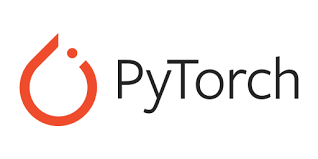

PyTorch is primarily a deep learning framework. It has been designed to make creating and working with deep neural networks as easy, fast and flexible as possible. Today we'll look at one of the core components that makes this possible: tensors. We'll start by looking at how to contruct and manipulate tensors, and then we'll explore the magic of autograd and how we can use it for optimization with gradient descent. 

Video:
- What is PyTorch?
- Creating tensors
- Modifying them
- Debugging tips
- Images as tensors

A lot of the material for this lessson was taken from the excellent content over at https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

### Imports

At the start of each notebook we'll import some libraries that will give us access to functionality beyond that offered by Python's standard library.

In [1]:
import torch 
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as ipd

## Creating Tensors

We can construct a tensor directly from some common python iterables, such as list and tuple. Nested iterables can also be handled as long as the dimensions make sense.

In [2]:
# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


The numerical arguments we pass to these constructors determine the shape of the output tensor - try changing them and see what happens.

In [3]:
x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[7.3045e+03, 3.0794e-41, 3.3631e-44, 0.0000e+00,        nan]]])


Notice that `.empty()` does not return zeros, but seemingly random small numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a bit faster if you are looking to just create a tensor.

There are also constructors for random numbers:

In [4]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")

Tensor a: tensor([[0.3447, 0.1209, 0.1926]])
Tensor b: tensor([[ 1.4875, -0.1660, -2.1172,  0.3189],
        [-1.8210, -1.3190, -0.4549,  0.9760],
        [ 0.7140,  1.1887,  1.1203,  0.3987]])


THINK: What's the difference? If you're curious, use `plt.hist(torch.randn(3, 4))` to view the distribution.

There are also constructors that allow us to construct a tensor according to the above constructors, but with dimensions equal to another tensor:

In [5]:
c = torch.zeros_like(a)
d = torch.rand_like(c)
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.3741, 0.6032, 0.3905]])


Finally,  `.arange()` and `.linspace()` behave how you would expect them to if you are familar with numpy.

In [6]:
a = torch.arange(0, 10, step=1) # Equivalent to np.arange(0, 10, step=1)
b = torch.linspace(0, 5, steps=11) # np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Tensor b: {b}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor b: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



#### Coding Exercise 1: Creating Tensors
Below you will find some incomplete code. Fill in the missing code to construct the specified tensors.

We want the tensors:

*A*: 20 by 21 tensor consisting of ones

*B*: a tensor with elements equal to the elements of numpy array Z

*C*: a tensor with the same number of elements as A but with values ∼U(0,1)

*D*: a 1D tensor containing the even numbers between 4 and 40 inclusive.

In [7]:
# The numpy array required for B
Z = np.vander([1, 2, 3], 4) 

# Fill in your solutions:
A = ...
B = ...
C = ...
D = ...

# Check your answers

Tip: use `.shape` to check the dimensions of a tensor. 

## Tensor Operations

We can perform operations on tensors using methods under `torch.`. However, in PyTorch most common Python operators are overridden, so we can use those instead. The common standard arithmetic operators (+, -, *, /, and **) have all been lifted to elementwise operations.

In [8]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
print('Addition via torch.add:', torch.add(x, y))
print('Addition using "+":', x+y) # The same
print('Some other operations:')
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

Addition via torch.add: tensor([ 2,  4,  7, 12])
Addition using "+": tensor([ 2,  4,  7, 12])
Some other operations:


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

DISCUSSION: What does 'element-wise' mean? Inspect the outputs above and discuss.

Tensors also have many built-in methods such as `.mean()` or `.sum()` (see the full list here: https://pytorch.org/docs/stable/tensors.html). Whenever you're working with a multi-dimensional tensor, pay attention to the dimensions and think about what result you're aiming to achieve.

In [9]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

tensor([[0.8643, 0.1199, 0.3509],
        [0.2528, 0.9335, 0.4162],
        [0.3367, 0.2161, 0.2303]])


Sum of every element of x: 3.720794916152954
Sum of the columns of x: tensor([1.4538, 1.2695, 0.9974])
Sum of the rows of x: tensor([1.3352, 1.6025, 0.7831])




In [10]:
# Exercise: display the means of each colum in x

In [11]:
# TODO some extra exercises

Remember we said most operations default to 'element-wise'? What if we want the matrix operation? Torch has you covered there as well. `torch.matmul()` or the `@` symbol let you do matrix multiplication. For dot multiplication, you can use torch.dot(). 

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.



In [12]:
# Exercise: create a few 2D tensors and try out some of these operations.

## Manipulating Tensors

Beyond mathematical operations, we often want to access specific items or sets if items in a tensor, or perform operations like changing the shape of a tensor. Here are a few examples of some common tasks. These may feel simple if you're used to something like numpy, but it's worth making sure you know how to do these basic operations (or at least, you know where to find these examples again to refer to them!) since we'll use these a lot in the coming lessons. 

In [13]:
# Indexing tensors
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3]) # From index 1 up to but NOT INCLUDING index 3
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


Reshaping works as long as the shapes make send. (3, 4) -> (4, 3) is fine, but (3, 4) -> (8, 2) won't work since there aren't enough elements!

In [14]:
# Reshaping
z = torch.arange(12).reshape(6, 2)
print(f"Original z (6, 2) : \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

Original z (6, 2) : 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [15]:
# Exercise: Use arange and reshape to make a tensor that looks like this: [[1, 2], [3, 4]]

Concatenating tensors is done with torch.cat - take a look at this examples and take note of how the dimension specified affects the output:

In [16]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


#concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


#### Squeezing tensors

When processing batches of data, you will quite often be left with singleton dimensions. e.g. [1,10] or [256, 1, 3]. This dimension can quite easily mess up your matrix operations if you don’t plan on it being there…

In order to compress tensors along their singleton dimensions we can use the .`squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [17]:
x = torch.randn(1, 10)
print(x.shape)
print(f"x[0]: {x[0]}") # printing the zeroth element of the tensor will not give us the first number!

torch.Size([1, 10])
x[0]: tensor([ 0.7635,  0.0183,  1.1285,  0.9283,  0.4555, -0.8724,  1.1850, -0.5766,
        -1.0110,  0.3631])


We could do `x[0][0]` but this can get tedious - instead, we can use `squeeze` to get rid of that extra dimension:

In [18]:
# lets get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: 0.7634584903717041


Adding singleton dimensions works a similar way, and is often used when tensors being added need same number of dimensions:

In [19]:
y = torch.randn(5, 5)
print(f"shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1) # Note the argument here is 1 - try 0 and 2 and make sure you get a feel for what unsqueeze does. 
print(f"shape of y: {y.shape}")

shape of y: torch.Size([5, 5])
shape of y: torch.Size([5, 1, 5])


# Image Operations

Loading Images, PIL <-> Pytorch, batches, practice

In [20]:
# Downloading the hsatily-prepared course logo from discord:
!curl https://cdn.discordapp.com/icons/884156511104958464/01ac8585ec71254e04a4baea91d1a43a.png?size=128 > logo.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16325  100 16325    0     0   194k      0 --:--:-- --:--:-- --:--:--  196k


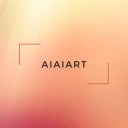

In [21]:
fn = '/content/logo.png'
im = Image.open(fn)
im # PIL images are easy to view directly in Jupyter

In [22]:
im_array = np.array(im)
print(im_array.shape) # width x height x channels (RGBA)

(128, 128, 4)


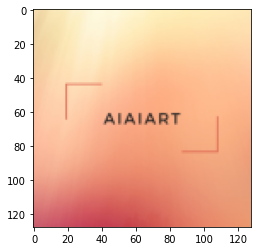

In [23]:
plt.imshow(im_array) # Matplotlib expects this format so this should work as well.

In [24]:
im_tensor = torch.tensor(im_array)
im_tensor.shape

torch.Size([128, 128, 4])

In [25]:
channels_first = im_tensor.permute(2, 0, 1)
channels_first.shape

torch.Size([4, 128, 128])

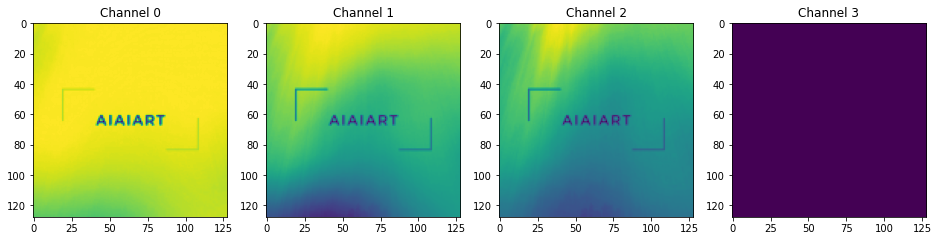

In [26]:
# Plotting each channel individually:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  axs[i].imshow(channels_first[i])
  axs[i].set_title(f'Channel {i}')

In [27]:
# Exercise: turn this into an RGB image, and then use unsqueeze to make the shape [1, 3, 500, 500]
img = channels_first[:3].unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [28]:
# Exercise: get this back to the PIL/matplotlib format (w, h, c)

In [29]:
# Exercise: turn it back into a PIL Image (hint: Image.fromarray) and save it to a new file

# Gradient Descent and Autograd

What is GD

How do we calculate gradients

Fitting a function with GD

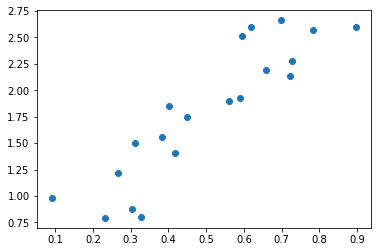

In [30]:
x = torch.rand(20)
y = 3*x + 0.2 + torch.randn(20)*0.3 # y = ax + b + noise
plt.scatter(x, y)

In [31]:
# TODO widgets to manually calc loss

0 tensor(1.3655, grad_fn=<PowBackward0>)
10 tensor(0.5279, grad_fn=<PowBackward0>)
20 tensor(0.4411, grad_fn=<PowBackward0>)
30 tensor(0.4206, grad_fn=<PowBackward0>)
40 tensor(0.4015, grad_fn=<PowBackward0>)
50 tensor(0.3839, grad_fn=<PowBackward0>)
60 tensor(0.3678, grad_fn=<PowBackward0>)
70 tensor(0.3534, grad_fn=<PowBackward0>)
80 tensor(0.3405, grad_fn=<PowBackward0>)
90 tensor(0.3292, grad_fn=<PowBackward0>)


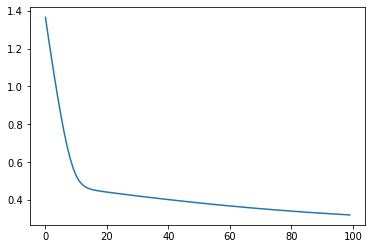

In [32]:
def rmse(y, y_hat):
  return torch.mean((y-y_hat)**2)**0.5 # See how many ways you can write this

def get_preds(x, w):
  y_hat = w[0]*x + w[1]
  return y_hat

w = torch.rand(2) # Our parameters
w.requires_grad = True # Explain

optimizer = torch.optim.SGD([w], lr=0.1) # What des SGD stand for?

losses = [] # Keep track of our losses (RMSE values)

for i in range(100):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Get our outputs
  y_hat = get_preds(x, w)

  # Calculate our loss
  loss = rmse(y, y_hat)

  # Store the loss for later
  losses.append(loss)

  # Print out updates ever few iterations
  if i % 10 == 0:
    print(i, loss)

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

plt.plot(losses)

In [33]:
w

tensor([1.9091, 0.8603], requires_grad=True)

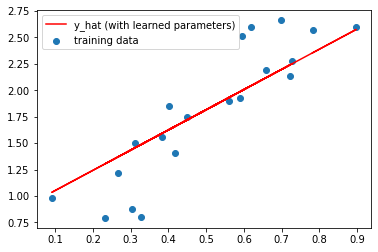

In [34]:
plt.scatter(x, y, label='training data')
plt.plot(x, get_preds(x, w).detach(), c='red', label='y_hat (with learned parameters)')
plt.legend()

# BONUS: Optimizing RGB Images with CLIP

In [35]:
print("Downloading CLIP and installing requirements")
!git clone https://github.com/openai/CLIP                 &> /dev/null
!pip install -q  ftfy regex tqdm omegaconf pytorch-lightning &> /dev/null # TODO check what is needed

In [36]:
from CLIP import clip # The clip model
from torchvision import transforms # Some useful image transforms
import torch.nn.functional as F # Some extra methods we might need
from tqdm.notebook import tqdm # A progress bar library

# Load in one of the models from CLIP
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
perceptor = clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)
print(perceptor.visual.input_resolution) # 224px a side

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 63.4MiB/s]


224


In [37]:
# Embed some text
text_embed = perceptor.encode_text(clip.tokenize("A watercolor painting of the sunset over a mountain range").to(device)).float()
text_embed.shape

torch.Size([1, 512])

In [38]:
# Create a random image
im = torch.rand(1, 3, 224, 224)

# Create a transform - this will map the image data to the same range as that seen by CLIP during training
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],std=[0.26862954, 0.26130258, 0.27577711])

# Embed the image
image_embed = perceptor.encode_image(normalize(im).to(device)).float()
image_embed.shape

torch.Size([1, 512])

In [39]:
def clip_loss_basic(im, text_embed):
  image_embed = perceptor.encode_image(normalize(im).to(device)).float()
  loss = torch.mean((image_embed - text_embed)**2)**0.5 # Root Mean Squared Error
  return loss

clip_loss_basic(im, text_embed) # Some measure of how closely our image matches the text prompt (hopefully)

tensor(0.4855)

  0%|          | 0/200 [00:00<?, ?it/s]

0 tensor(0.4837, grad_fn=<PowBackward0>)
10 tensor(0.3324, grad_fn=<PowBackward0>)
20 tensor(0.3034, grad_fn=<PowBackward0>)
30 tensor(0.2748, grad_fn=<PowBackward0>)
40 tensor(0.2885, grad_fn=<PowBackward0>)
50 tensor(0.2663, grad_fn=<PowBackward0>)
60 tensor(0.2559, grad_fn=<PowBackward0>)
70 tensor(0.2417, grad_fn=<PowBackward0>)
80 tensor(0.2471, grad_fn=<PowBackward0>)
90 tensor(0.2264, grad_fn=<PowBackward0>)
100 tensor(0.2436, grad_fn=<PowBackward0>)
110 tensor(0.2323, grad_fn=<PowBackward0>)
120 tensor(0.2218, grad_fn=<PowBackward0>)
130 tensor(0.2146, grad_fn=<PowBackward0>)
140 tensor(0.2097, grad_fn=<PowBackward0>)
150 tensor(0.2221, grad_fn=<PowBackward0>)
160 tensor(0.2089, grad_fn=<PowBackward0>)
170 tensor(0.2248, grad_fn=<PowBackward0>)
180 tensor(0.2099, grad_fn=<PowBackward0>)
190 tensor(0.2055, grad_fn=<PowBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


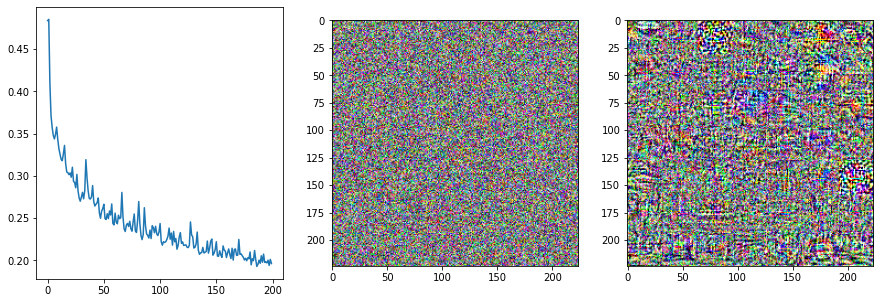

In [40]:
# The target text
text_embed = perceptor.encode_text(clip.tokenize("A watercolor painting of the sunset over a mountain range").to(device)).float()

# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer
optimizer = torch.optim.SGD([im], lr=500) # Try a range of values (0.1, 1, 10, 100 ...). Discuss why a larger value than usual might make sense here.

losses = [] # Keep track of our losses (RMSE values)

for i in tqdm(range(200)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss
  loss = clip_loss_basic(im, text_embed)

  # Store the loss for later
  if i % 10 == 0:
    print(i, loss)
  losses.append(loss)

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


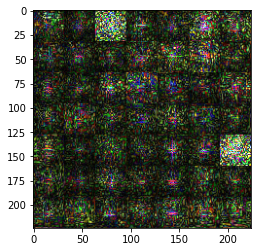

In [41]:
plt.imshow(torch.abs(im.detach()-start_im).squeeze().permute(1, 2, 0)) # The absolute difference between the starting and ending images

Woah - what's going on here?

- RMSE not great for high-dimensional spaces
- Talk about ViT using patches
- No clipping of our pixels
- Aggressive LR

Improvements: 
- Great Circle Distance?
- Transforms
- 

  0%|          | 0/200 [00:00<?, ?it/s]

0 tensor(0.9400, grad_fn=<MeanBackward0>)
10 tensor(0.9313, grad_fn=<MeanBackward0>)
20 tensor(0.9166, grad_fn=<MeanBackward0>)
30 tensor(0.9146, grad_fn=<MeanBackward0>)
40 tensor(0.9098, grad_fn=<MeanBackward0>)
50 tensor(0.7470, grad_fn=<MeanBackward0>)
60 tensor(0.7348, grad_fn=<MeanBackward0>)
70 tensor(0.7572, grad_fn=<MeanBackward0>)
80 tensor(0.7210, grad_fn=<MeanBackward0>)
90 tensor(0.8452, grad_fn=<MeanBackward0>)
100 tensor(0.6888, grad_fn=<MeanBackward0>)
110 tensor(0.7026, grad_fn=<MeanBackward0>)
120 tensor(0.7421, grad_fn=<MeanBackward0>)
130 tensor(0.9277, grad_fn=<MeanBackward0>)
140 tensor(0.8026, grad_fn=<MeanBackward0>)
150 tensor(0.7758, grad_fn=<MeanBackward0>)
160 tensor(0.7148, grad_fn=<MeanBackward0>)
170 tensor(0.8049, grad_fn=<MeanBackward0>)
180 tensor(0.7163, grad_fn=<MeanBackward0>)
190 tensor(0.8916, grad_fn=<MeanBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


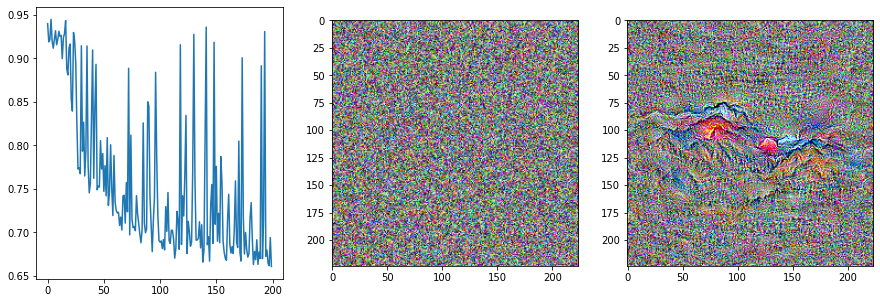

In [42]:
tfms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(5),
    transforms.ColorJitter(),
    transforms.GaussianBlur(5),
])

def clip_loss(im, text_embed):
  image_embed = perceptor.encode_image(tfms(im).to(device)).float()
  input_normed = F.normalize(image_embed.unsqueeze(1), dim=2)
  embed_normed = F.normalize(text_embed.unsqueeze(0), dim=2)
  dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2) # Squared Great Circle Distance
  return dists.mean()

# The target text
text_embed = perceptor.encode_text(clip.tokenize("A watercolor painting of the sunset over a mountain range").to(device)).float()

# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer
optimizer = torch.optim.SGD([im], lr=50)

losses = [] # Keep track of our losses (RMSE values)

for i in tqdm(range(200)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss
  loss = clip_loss(im.clip(0, 1), text_embed) # note .clip(0, 1)

  # Store the loss for later
  if i % 10 == 0:
    print(i, loss)
  losses.append(loss)

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))

# BONUS: Different Optimizers and Regularization

Link sebs page, show PyTorch functions, try one with weight-decay

  0%|          | 0/100 [00:00<?, ?it/s]

0 tensor(0.9367, grad_fn=<AddBackward0>)
10 tensor(0.7692, grad_fn=<AddBackward0>)
20 tensor(0.7333, grad_fn=<AddBackward0>)
30 tensor(0.7573, grad_fn=<AddBackward0>)
40 tensor(0.6937, grad_fn=<AddBackward0>)
50 tensor(0.7001, grad_fn=<AddBackward0>)
60 tensor(0.6687, grad_fn=<AddBackward0>)
70 tensor(0.6743, grad_fn=<AddBackward0>)
80 tensor(0.6914, grad_fn=<AddBackward0>)
90 tensor(0.6821, grad_fn=<AddBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


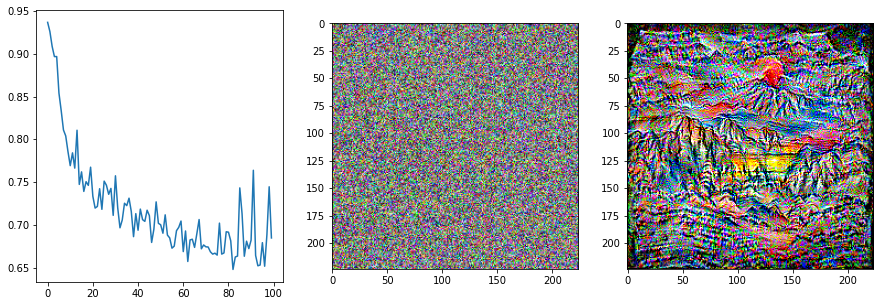

In [43]:
# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer
optimizer = torch.optim.Adam([im], lr=0.05, weight_decay=1e-6)

losses = [] # Keep track of our losses (RMSE values)

for i in tqdm(range(100)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss across several different random crops
  loss = 0
  n_crops = 4
  for _ in range(n_crops):
    loss += clip_loss(im.clip(0, 1), text_embed)/n_crops

  # Store the loss for later
  if i % 10 == 0:
    print(i, loss)
  losses.append(loss)

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))